In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [45]:
df.describe(include='O')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [42]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

# RFM analysis

In [7]:
aggregated_df = df.groupby(by='Customer ID', as_index=False).agg(
    MonetaryValue = ('Sales', 'sum'),
    Frequency = ('Order ID', 'nunique'),
    LastInvoiceDate = ('Order Date', 'max')
)

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,AA-10315,5563.560,5,2017-06-29
1,AA-10375,1056.390,9,2017-12-11
2,AA-10480,1790.512,4,2017-04-15
3,AA-10645,5086.935,6,2017-11-05
4,AB-10015,886.156,3,2016-11-10
5,AB-10060,7755.620,8,2017-11-06
6,AB-10105,14473.571,10,2017-11-19
7,AB-10150,966.710,5,2017-11-19
8,AB-10165,1113.838,8,2017-12-05
9,AB-10255,914.532,9,2017-07-17


In [8]:
# get recency column

max_invoice_date = aggregated_df['LastInvoiceDate'].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days

aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,AA-10315,5563.560,5,2017-06-29,184
1,AA-10375,1056.390,9,2017-12-11,19
2,AA-10480,1790.512,4,2017-04-15,259
3,AA-10645,5086.935,6,2017-11-05,55
4,AB-10015,886.156,3,2016-11-10,415
5,AB-10060,7755.620,8,2017-11-06,54
6,AB-10105,14473.571,10,2017-11-19,41
7,AB-10150,966.710,5,2017-11-19,41
8,AB-10165,1113.838,8,2017-12-05,25
9,AB-10255,914.532,9,2017-07-17,166


In [9]:
aggregated_df.shape

(793, 5)

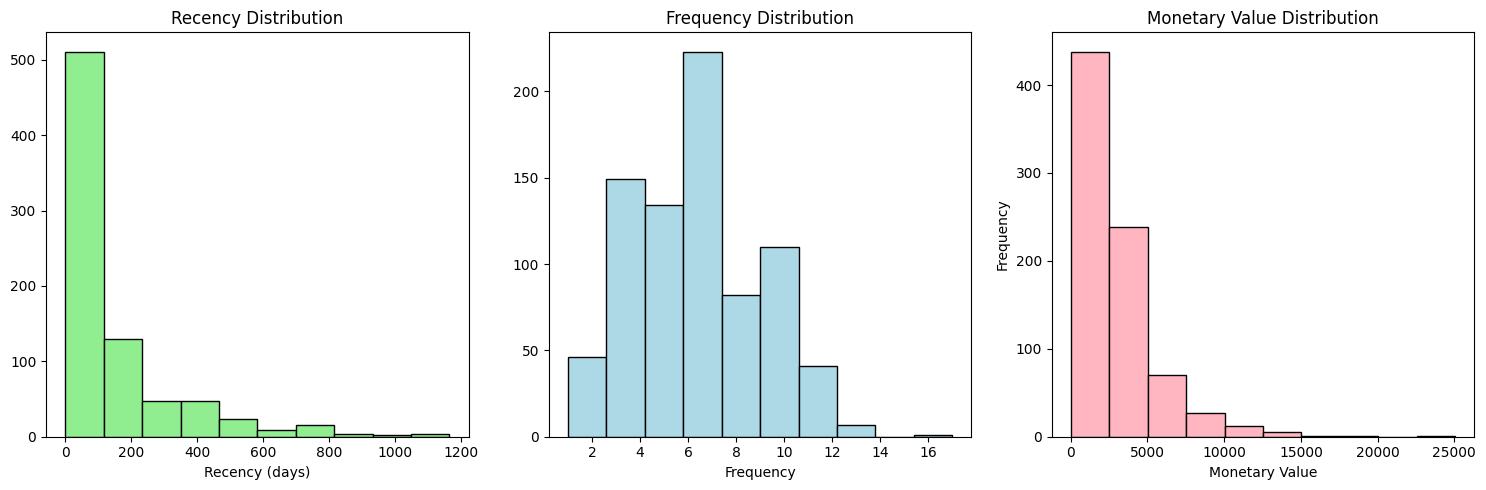

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Recency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightblue', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='lightpink', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

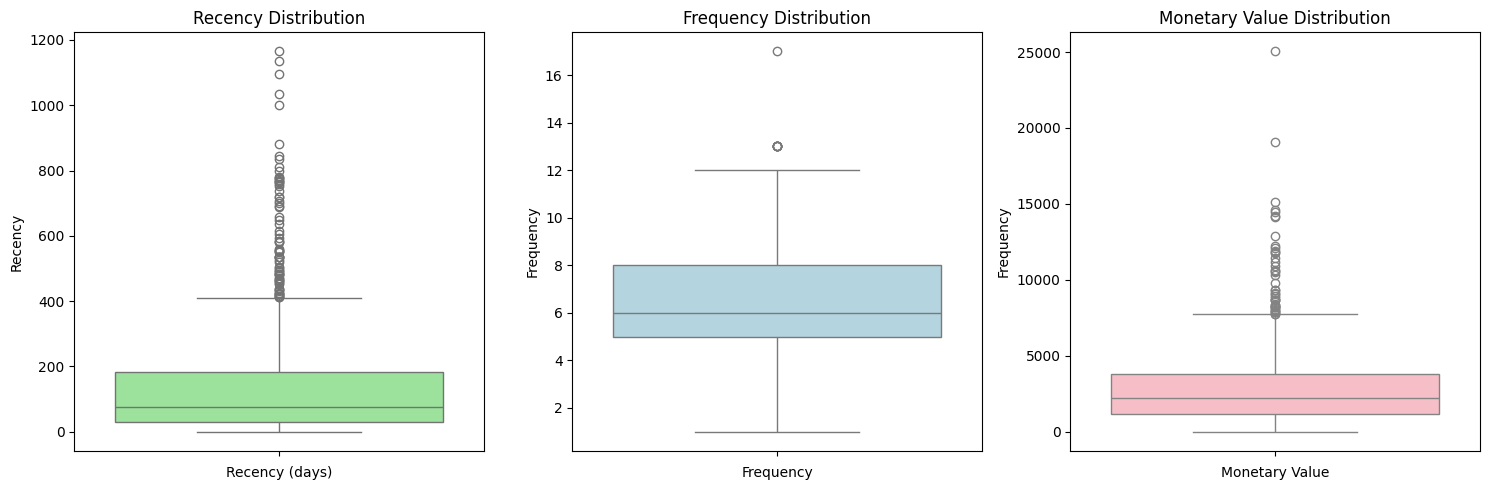

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_df['Recency'], color='lightgreen')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_df['Frequency'], color='lightblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_df['MonetaryValue'], color='lightpink')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# separate outliers when doing clustering, but we still want to keep them in the dataset as they are valuable customers

M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR = M_Q3 - M_Q1
monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df['MonetaryValue'] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outliers_df.describe()

,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,43.000000,43.000000,43,43.000000
mean,10704.986972,8.023256,2017-08-12 16:11:09.767441920,139.325581
min,7754.976000,3.000000,2015-09-17 00:00:00,2.000000
25%,8302.592000,6.000000,2017-08-06 00:00:00,41.500000
50%,9351.212000,8.000000,2017-11-04 00:00:00,56.000000
75%,11855.935500,10.500000,2017-11-18 12:00:00,146.000000
max,25043.050000,13.000000,2017-12-28 00:00:00,835.000000
std,3384.488747,2.824117,NaN,174.338166


In [13]:
R_Q1 = aggregated_df['Recency'].quantile(0.25)
R_Q3 = aggregated_df['Recency'].quantile(0.75)
R_IQR = R_Q3 - R_Q1
recency_outliers_df = aggregated_df[(aggregated_df['Recency'] > (R_Q3 + 1.5 * R_IQR)) | (aggregated_df['Recency'] < (R_Q1 - 1.5 * R_IQR))].copy()
recency_outliers_df.describe()

,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,74.000000,74.000000,74,74.000000
mean,1768.909036,3.621622,2016-04-21 21:04:51.891891968,617.121622
min,5.304000,1.000000,2014-10-22 00:00:00,413.000000
25%,470.790750,2.000000,2015-12-12 00:00:00,472.750000
50%,1069.358250,4.000000,2016-06-21 12:00:00,556.500000
75%,2146.816000,5.000000,2016-09-13 06:00:00,749.000000
max,10501.653000,7.000000,2016-11-12 00:00:00,1165.000000
std,2063.838654,1.523359,NaN,183.770923


In [14]:
# create a new DataFrame without outliers for clustering
non_outliers_df = aggregated_df[~aggregated_df.index.isin(monetary_outliers_df.index) & ~aggregated_df.index.isin(recency_outliers_df.index)]

non_outliers_df.describe()

,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,679.000000,679.000000,679,679.000000
mean,2553.511085,6.494845,2017-09-22 20:47:00.618556672,98.134021
min,4.833000,1.000000,2016-11-15 00:00:00,0.000000
25%,1210.270000,5.000000,2017-08-26 00:00:00,28.000000
50%,2256.394000,6.000000,2017-10-30 00:00:00,61.000000
75%,3486.979800,8.000000,2017-12-02 00:00:00,126.000000
max,7721.714000,17.000000,2017-12-30 00:00:00,410.000000
std,1721.671123,2.420942,NaN,97.892759


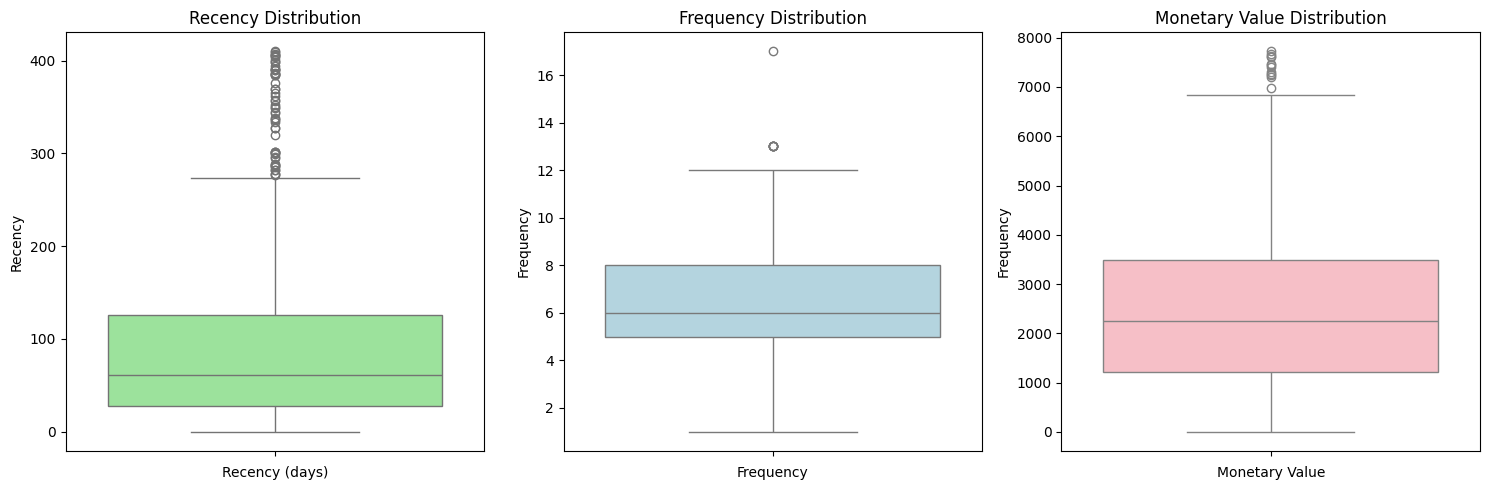

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.boxplot(data = non_outliers_df['Recency'], color='lightgreen')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')

plt.subplot(1, 3, 2)
sns.boxplot(data = non_outliers_df['Frequency'], color='lightblue')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data = non_outliers_df['MonetaryValue'], color='lightpink')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

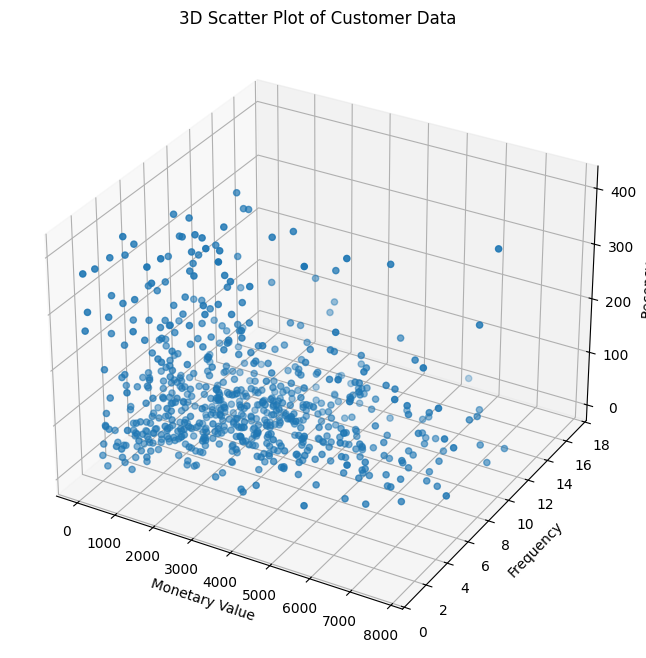

In [16]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

In [17]:
# standardise the data to get mean 0, standard deviation 1
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 1.74961865, -0.61791946,  0.87778994],
       [-0.87021541,  1.03554778, -0.80897053],
       [-0.44350024, -1.03128627,  1.64449924],
       ...,
       [ 1.68613933, -0.61791946, -0.96231239],
       [ 2.42206812,  0.62218097, -0.91119844],
       [-0.61588312, -0.61791946,  1.06180017]], shape=(679, 3))

In [18]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])

scaled_data_df.head(10)

,MonetaryValue,Frequency,Recency
0,1.749619,-0.617919,0.877790
1,-0.870215,1.035548,-0.808971
2,-0.443500,-1.031286,1.644499
3,1.472576,-0.204553,-0.440950
7,-0.922343,-0.617919,-0.584069
8,-0.836823,0.622181,-0.747634
9,-0.952672,1.035548,0.693780
10,-0.603143,-1.031286,-0.492064
11,-0.946122,-1.444653,1.368484
12,1.728860,0.208814,-0.890753


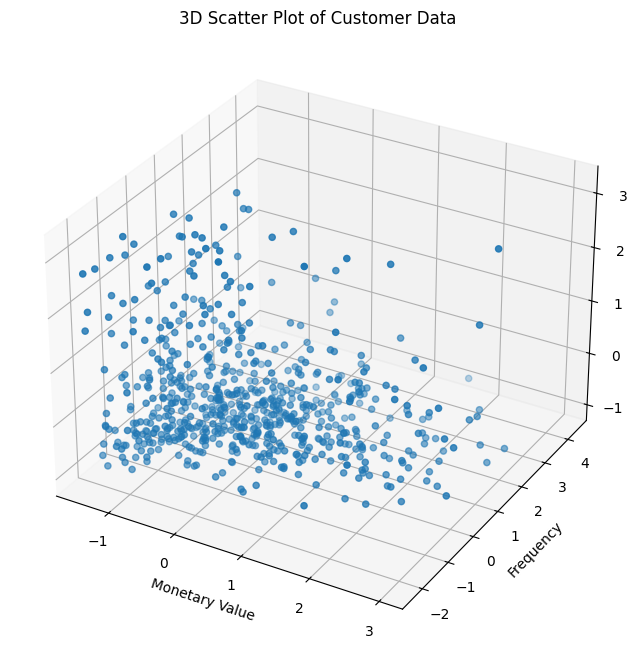

In [19]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'],
                     scaled_data_df['Frequency'],
                     scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

# K Means Clustering

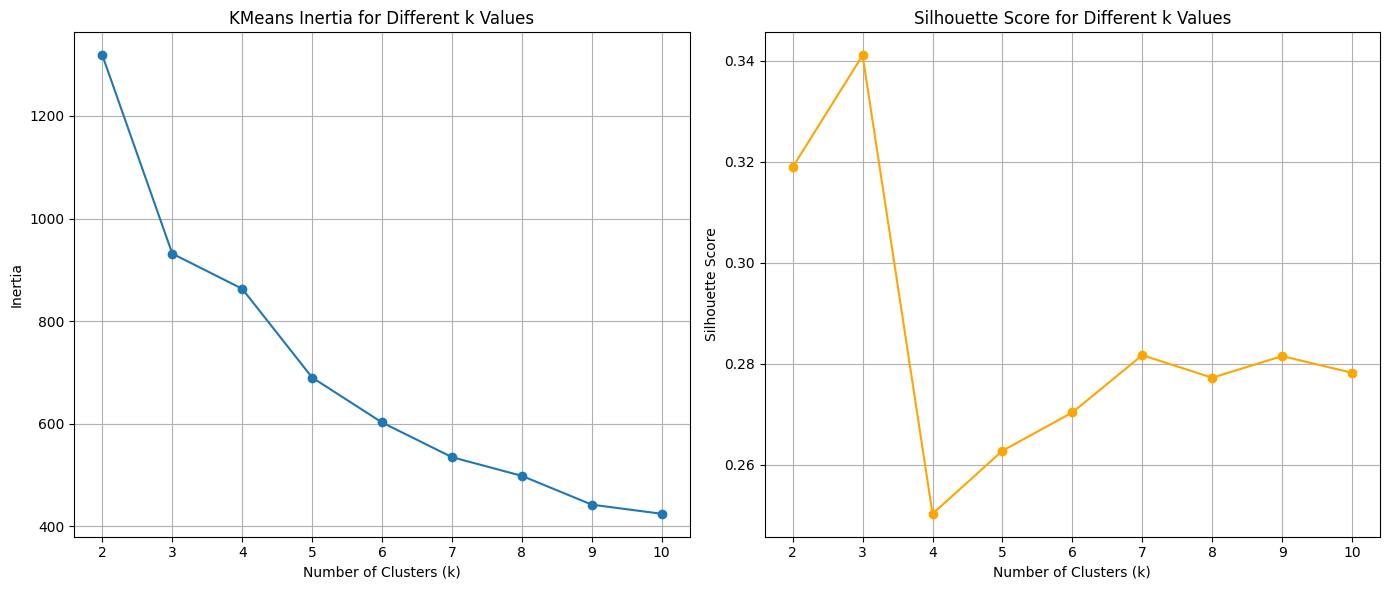

In [20]:
# high silhouette score indicates that the clusters are well separated
# range of silhouette scores: [-1,1], where 1 is best, 0 is average, and negative is bad

max_k = 10
inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    silhouette_scores.append(silhouette_score(scaled_data_df,cluster_labels))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)

In [22]:
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df.head(10)

/var/folders/pr/hvc7f3n57m539fg1hchqjr7h0000gn/T/ipykernel_46949/800189557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,AA-10315,5563.560,5,2017-06-29,184,0
1,AA-10375,1056.390,9,2017-12-11,19,2
2,AA-10480,1790.512,4,2017-04-15,259,1
3,AA-10645,5086.935,6,2017-11-05,55,0
7,AB-10150,966.710,5,2017-11-19,41,2
8,AB-10165,1113.838,8,2017-12-05,25,2
9,AB-10255,914.532,9,2017-07-17,166,2
10,AB-10600,1515.862,4,2017-11-10,50,2
11,AC-10420,925.800,3,2017-05-12,232,1
12,AC-10450,5527.846,7,2017-12-19,11,0


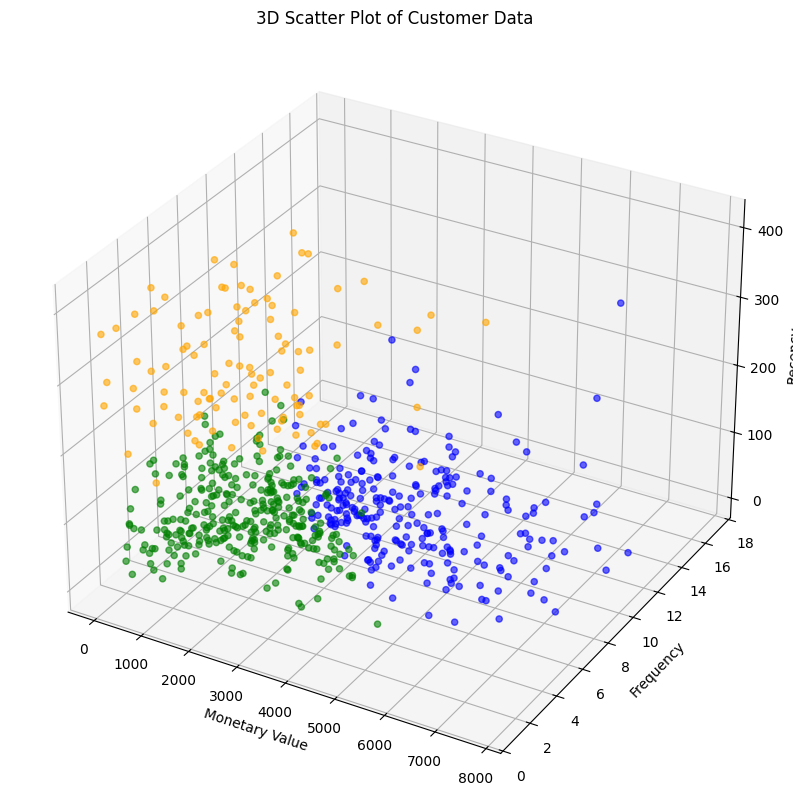

In [23]:
cluster_colours = {
    0: 'blue',
    1: 'orange',
    2: 'green',
}

colours = non_outliers_df['Cluster'].map(cluster_colours)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colours, alpha=0.6,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

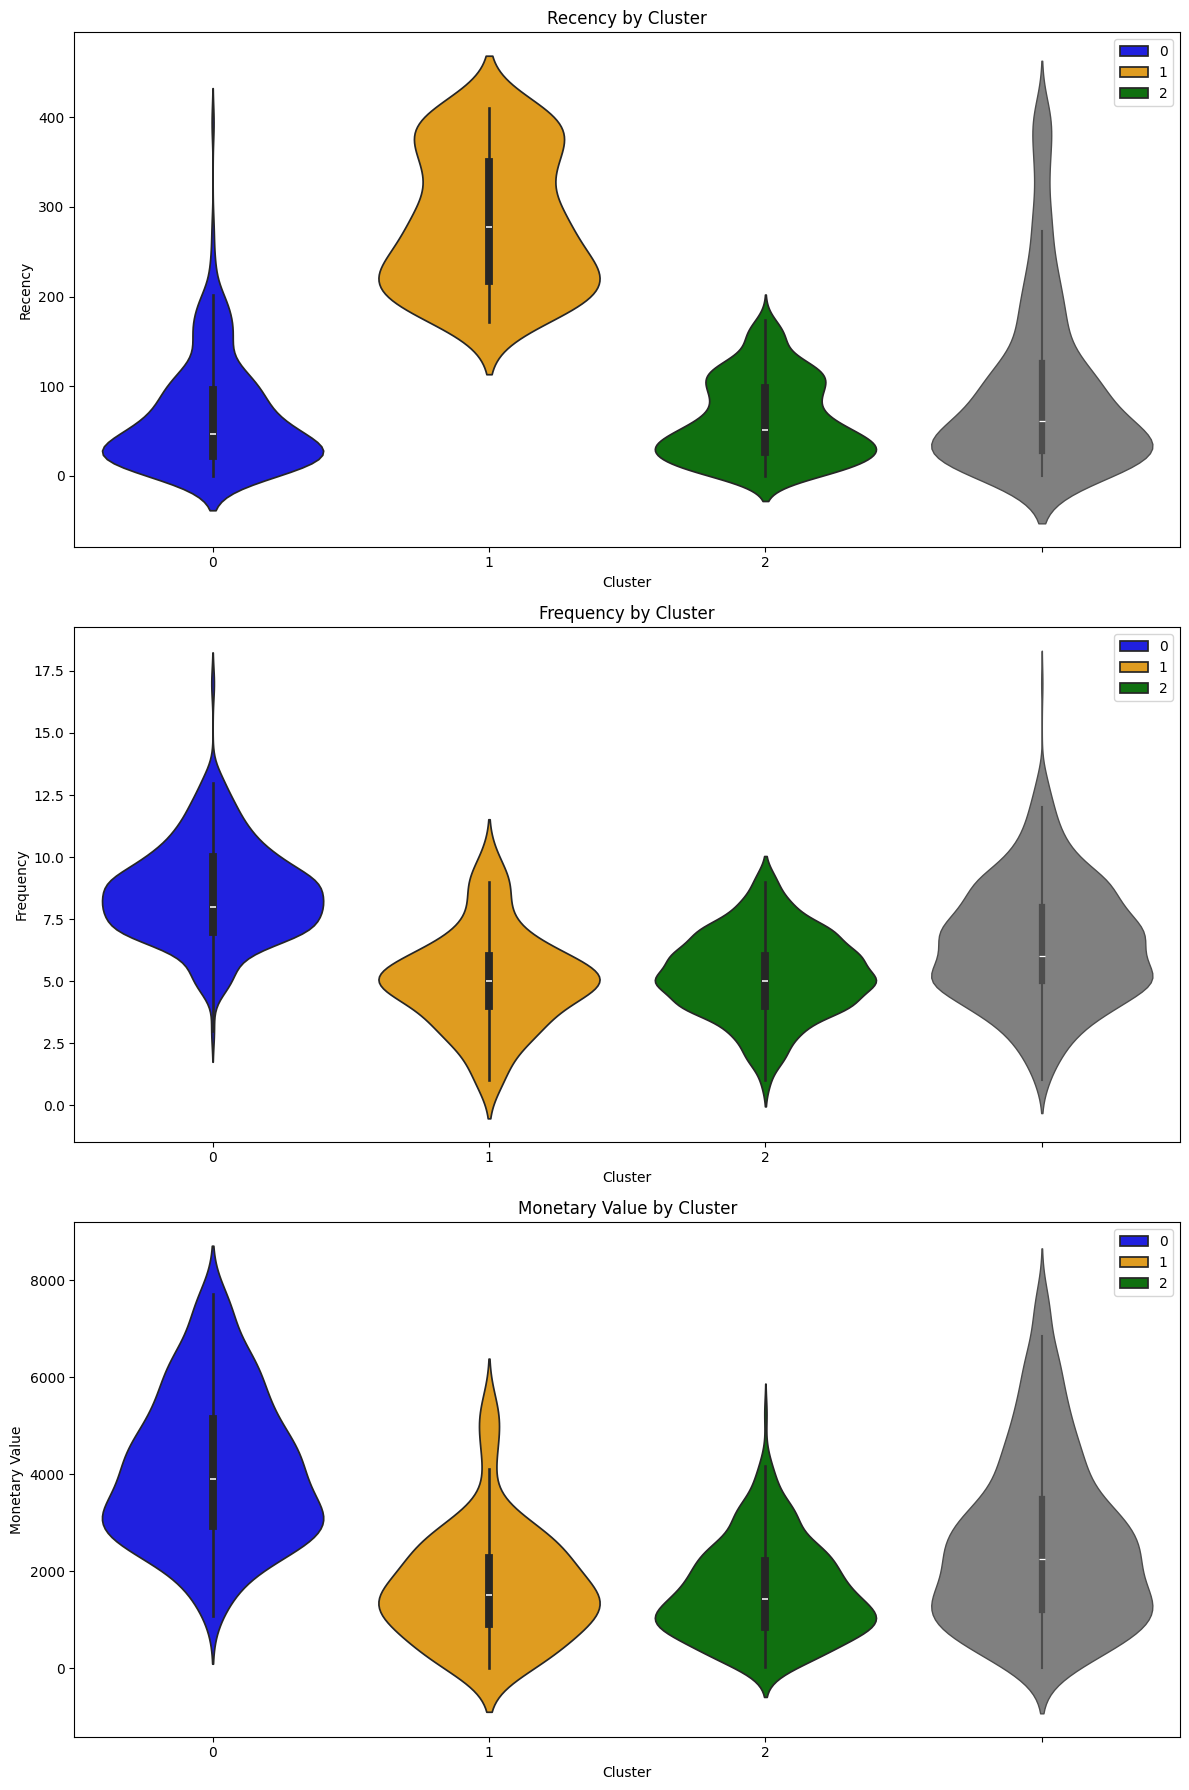

In [24]:
plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colours, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')


plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colours, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colours, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.tight_layout()
plt.show()

Cluster 0 (blue): Reward
- average recency, higher than average frequency, higher than average monetary value
- high-value buyers who purchased recently & frequently from the business.
- reward their loyalty with loyalty-based rewards -- keep them engaged and satisfied
- exclusive product previews, early access

Cluster 1 (orange): Re-engage
- high recency, average frequency, lower than average monetary value
- low-value, old customers
- focus on re-engagement by implementing targeted discounts and reminders to encourage them to return and purchase again
- eg. anniversary discount, product upgrade reminders
- personalised recommendations such as popular, low cost items that they may love

Cluster 2 (green): Nurture
- average recency, average frequency, lower than average monetary value
- low-value, infrequent, new buyers who have not spent much with the business. -> low familiarity with brand
- offer limited time discount for their next purchase
- targeted product recommendations, such as "frequently bought together"
- referral rewards -- refer friends who spend to get discount

In [25]:
overlap_indices = monetary_outliers_df.index.intersection(recency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
recency_only_outliers = recency_outliers_df.drop(overlap_indices)
monetary_and_recency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers['Cluster'] = -1
recency_only_outliers['Cluster'] = -2
monetary_and_recency_outliers['Cluster'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, recency_only_outliers, monetary_and_recency_outliers])

outlier_clusters_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
5,AB-10060,7755.620,8,2017-11-06,54,-1
6,AB-10105,14473.571,10,2017-11-19,41,-1
34,AH-10690,7888.294,12,2016-11-15,410,-1
90,BM-11140,11789.630,4,2017-02-26,307,-1
131,CC-12370,12129.072,5,2017-11-17,43,-1
146,CJ-12010,11164.974,8,2017-06-24,189,-1
152,CL-12565,10880.546,12,2017-03-21,284,-1
160,CM-12385,8954.020,4,2017-11-23,37,-1
234,DR-12940,8350.868,8,2017-11-10,50,-1
257,EH-13765,10310.880,12,2017-08-17,135,-1


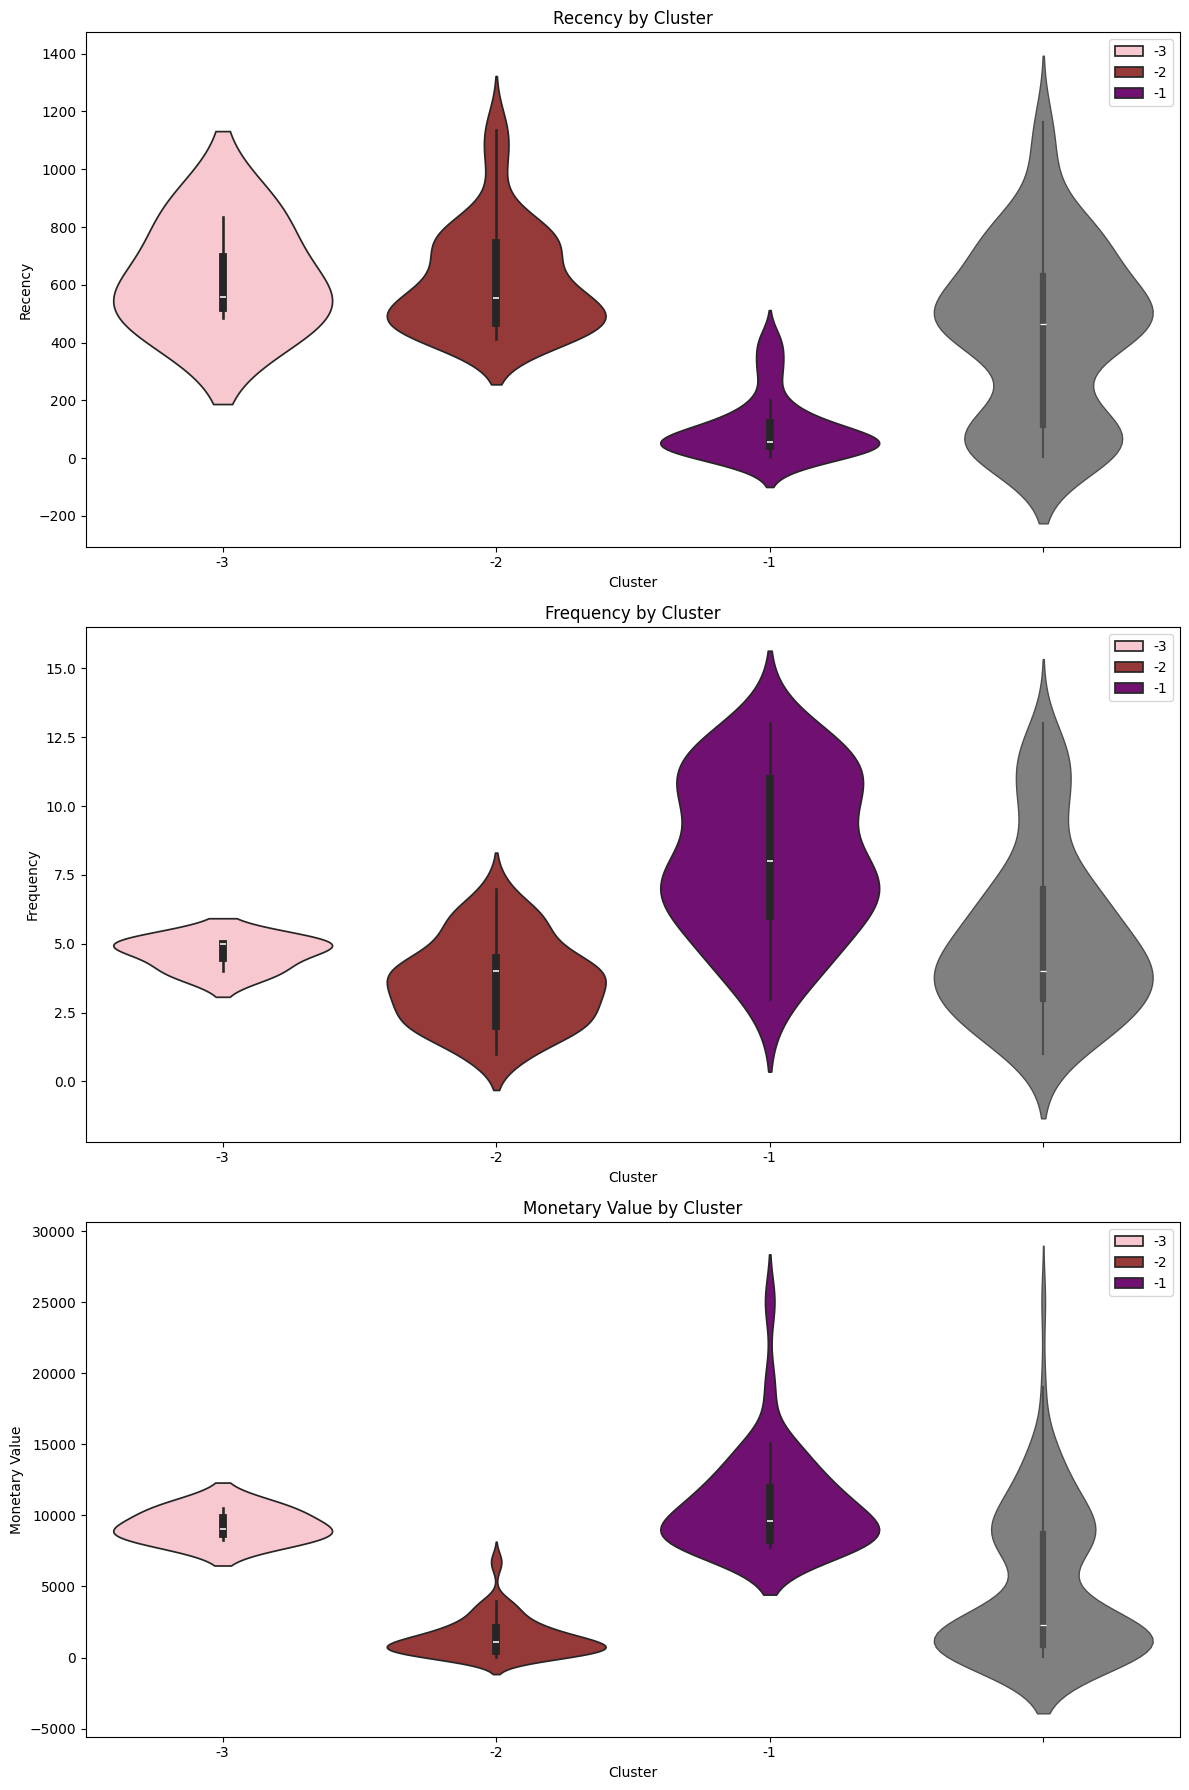

In [26]:
cluster_colours = {
    -1: 'purple',
    -2: 'brown',
    -3: 'pink',
}

plt.figure(figsize=(12,18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colours, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colours, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colours, hue=outlier_clusters_df['Cluster'])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.tight_layout()
plt.show()

Cluster -1 (purple) (monetary outliers):
- low recency, high frequency, high monetary value
- high value and very recent buyers
- focus on maintaining their loyalty and offering services that cater to their high spending capacity
- cluster tgt with cluster 0

Cluster -2 (brown) (recency outliers):
- high recency, average frequency, low monetary value
- old buyers with low spend
- focus on re-engagement
- cluster tgt with cluster 1

Cluster -3 (pink) (monetary and recency outliers): Reconnect
- high recency, average frequency, high monetary value
- old buyers with high spend
- appeal them to spend again, eg. spend to keep/upgrade the membership, one-time discount for loyalty

In [27]:
outlier_clusters_df['Cluster'] = outlier_clusters_df['Cluster'].replace({-1: 0, -2: 1})
outlier_clusters_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
5,AB-10060,7755.620,8,2017-11-06,54,0
6,AB-10105,14473.571,10,2017-11-19,41,0
34,AH-10690,7888.294,12,2016-11-15,410,0
90,BM-11140,11789.630,4,2017-02-26,307,0
131,CC-12370,12129.072,5,2017-11-17,43,0


In [28]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

cluster_labels = {
    0: 'Reward',
    1: 'Re-engage',
    2: 'Nurture',
    -3: 'Reconnect'
}

full_clustering_df['ClusterLabel'] = full_clustering_df['Cluster'].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,AA-10315,5563.560,5,2017-06-29,184,0,Reward
1,AA-10375,1056.390,9,2017-12-11,19,2,Nurture
2,AA-10480,1790.512,4,2017-04-15,259,1,Re-engage
3,AA-10645,5086.935,6,2017-11-05,55,0,Reward
7,AB-10150,966.710,5,2017-11-19,41,2,Nurture
...,...,...,...,...,...,...,...
776,VD-21670,6442.254,6,2016-05-28,581,1,Re-engage
785,VT-21700,1736.596,2,2015-04-05,1000,1,Re-engage
104,BS-11365,10501.653,5,2016-06-20,558,-3,Reconnect
422,KD-16270,8282.358,5,2016-09-02,484,-3,Reconnect


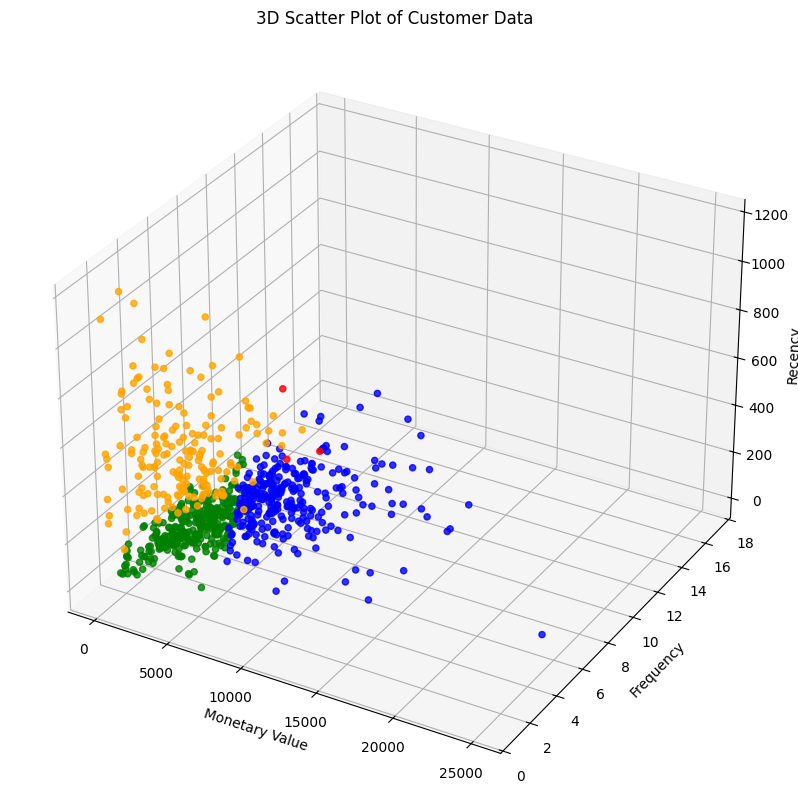

In [31]:
cluster_colours = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    -3: 'red',
}

colours = full_clustering_df['Cluster'].map(cluster_colours)

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(full_clustering_df['MonetaryValue'],
                     full_clustering_df['Frequency'],
                     full_clustering_df['Recency'],
                     c=colours, alpha=0.8,
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

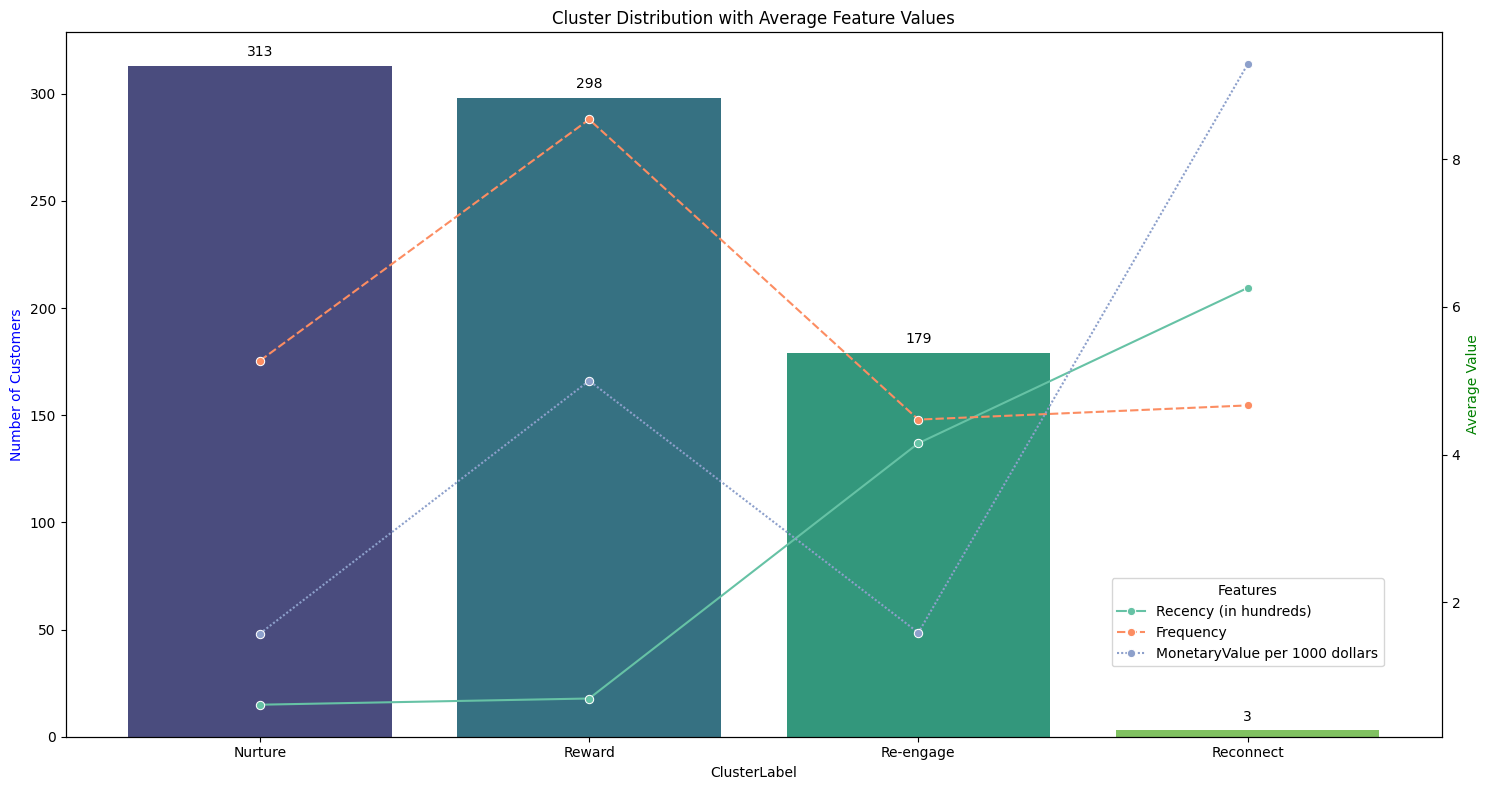

In [30]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 1000 dollars"] = full_clustering_df["MonetaryValue"] / 1000.00
full_clustering_df["Recency (in hundreds)"] = full_clustering_df["Recency"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency (in hundreds)', 'Frequency', 'MonetaryValue per 1000 dollars']].mean()

fig, ax1 = plt.subplots(figsize=(15, 8))

barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, 
        height + max(cluster_counts.values) * 0.01,
        f'{int(height)}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='black'
    )

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

ax2.legend(
    title='Features',
    loc='lower left', 
    bbox_to_anchor=(0.76, 0.1),
    borderaxespad=0,
    frameon=True
)

plt.tight_layout()
plt.show()

# Summary

Nurture:
This group consists of new, low-value, and infrequent buyers who have made only small or one-time purchases. Their limited interaction suggests low familiarity with the brand, and they may be unsure about the value or fit of the products. To build trust and encourage continued engagement, offer a limited-time discount on their next purchase to prompt immediate action. Use targeted product recommendations, such as “frequently bought together” items, to reduce decision fatigue and increase cart size. Additionally, introduce a referral rewards program that incentivises them to share the brand with friends — for example, offering a discount when a referred friend makes a purchase. This both grows the customer base and reinforces brand trust.

Reward:
These are high-value buyers who show average recency, above-average frequency, and high monetary value. They’ve demonstrated strong engagement and brand preference by purchasing recently and repeatedly. To retain this valuable group, focus on rewarding their loyalty with meaningful, experience-driven benefits. Offer perks such as exclusive product previews, early access to new collections, or tiered loyalty rewards that recognise their continued support. These actions reinforce their positive experience with the brand, keeping them both satisfied and engaged.

Re-engage
This segment includes customers with high recency, average frequency, but lower-than-average spend. These are older buyers who have lapsed in value, and may be losing interest or shifting attention to competitors. The goal is to bring them back into the purchase cycle through gentle nudges and smart incentives. Consider anniversary discounts, product upgrade reminders, or targeted low-cost recommendations tailored to their previous purchases. Personalised emails featuring popular, affordable items they might like can reduce friction and make re-engagement more approachable and effective.

Reconnect: (aka monetary and recency outliers)
This group consists of old customers with high past spend — the monetary and recency outliers. Though they haven’t purchased in a long time, their previous transactions indicate significant value. They’re ideal candidates for high-touch win-back strategies. Appeal to their sense of exclusivity by offering membership-based incentives — for example, “Spend again to keep your VIP status” or a one-time loyalty discount. These customers may not respond to generic campaigns, but a personalized reminder of the value they once saw in the brand can motivate a return.

While discounts can incentivise short-term purchases, value-added strategies build long-term relationships. Enhancing delivery speed and customer service quality increases perceived value. Cross-selling is also highly effective — offering relevant add-ons can improve customer experience and boost cart size:
- Technology: Suggest accessories such as cables, cases, or extended warranties
- Office Supplies: Recommend replenishment items or cost-saving bundles
- Furniture: Promote complementary pieces to purchased furnitures

Finally, consider implementing a loyalty program that grows with the customer to create a sustainable and meaningful connection.